
#  Investigate a Dataset TMDb movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> what can we do with information about 10,000 movies collected from The Movie Database (TMDb), we will analysis these data to get some answers about some questions :
**Which genres are most popular? 
which genre has the The Highest revenue ??**
in this data we have information about genre, adjusted budget ,adjusted revenue movies and etc for most of all movies lets dive in code 

In [47]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> in this section 
>
1:Upload ,open and read data
>
2:Assessing Data 
>
3:Clean data

### General Properties

In [48]:
# Load data 
df=pd.read_csv("tmdb-movies.csv")

#### Reading data

In [49]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
#last 10 rows
df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [51]:
#shape of the dataframe
df.shape

(10866, 21)

#### Assessing Data 
to know the structure of our data 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [53]:
#check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [54]:
#name of columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


### Data Cleaning of (TMDb movie) Dataset

> only columns of (popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj) that we need or will help to answer the questions that we asked 


In [55]:
# remove columns thats we don't need in the analysis 
df.drop(["id", 'imdb_id','cast', 'homepage','tagline', 'keywords', 'overview','original_title',
       'cast','director','production_companies', 'release_date',"vote_count","budget","revenue"], axis=1 , inplace= True )
df.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [56]:
# the new shape od data frame
df.shape

(10866, 7)

In [57]:
#chech for duplicated 
sum(df.duplicated())

1

In [58]:
# the duplicated row
df[df.duplicated()]

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


In [59]:
#remove the duplicated row
df.drop_duplicates(inplace=True)

In [60]:
#chech for duplicated again
sum(df.duplicated())

0

In [61]:
#check of null values
df.isnull().sum()

popularity       0
runtime          0
genres          23
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [62]:
#remove rows with null values
df.dropna(inplace=True)

In [63]:
##check of null values
df.isnull().sum()

popularity      0
runtime         0
genres          0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [64]:
#check if dataframe has zero elemens
df.eq(0).any().any()

True

In [65]:
# creates a boolean dataframe which is True where df is nonzero
df != 0

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


In [66]:
# Remove rows with zero values.
df = df[(df != 0).all(1)]
df.head()

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [67]:
#check if dataframe has zero elemens
df.eq(0).any().any()

False

In [68]:
#the new data shape
df.shape

(3854, 7)

there are alot hybrids genres we will split them into a new rows


In [69]:
data = df.join(df.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genre')).reset_index(drop=True)

data.head(8)

,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08,Action
5,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08,Adventure
6,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
7,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08,Thriller


In [70]:
#check on clean data before exploring
df.isnull().sum()

popularity      0
runtime         0
genres          0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [71]:
#some statistics
data.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10303.000000,10303.000000,10303.000000,10303.000000,1.030300e+04,1.030300e+04
mean,1.262140,109.568572,6.156100,2000.921867,4.953497e+07,1.517441e+08
std,1.607645,20.354248,0.789695,11.277350,4.766345e+07,2.324153e+08
min,0.001117,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.476927,96.000000,5.700000,1995.000000,1.554024e+07,2.041316e+07
50%,0.843170,106.000000,6.200000,2004.000000,3.448528e+07,6.847909e+07
75%,1.462242,119.000000,6.700000,2010.000000,6.956016e+07,1.825920e+08
max,32.985763,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


from previous statistics we found out the avg **budget** is (4.953497e+07) <
< the avg **revenue** is (1.517441e+08)
<avg **runtime** is (110 min) and some other statistics

the main column we work with is the  genre we will figure out the mean  between the genre and every column

In [72]:
# the mean adjusted budget by genre
mean_genre_budget = data.groupby('genre').budget_adj.mean()

# the mean popularity by genre
mean_genre_popularity = data.groupby('genre').popularity.mean()

# the mean runtime by genre
mean_genre_runtime = data.groupby('genre').runtime.mean()

# the mean release year by genre
mean_genre_release_year = data.groupby('genre').release_year.mean()

# the mean vote average by genre
mean_genre_vote = data.groupby('genre').vote_average.mean()

#  the mean adjusted revenue by genre
mean_genre_revenue = data.groupby('genre').revenue_adj.mean()


collect all groups mean data in one data frame

In [73]:
mean_genre_data = pd.concat([ mean_genre_budget,mean_genre_popularity, mean_genre_revenue, mean_genre_runtime, mean_genre_release_year, mean_genre_vote],axis=1)
mean_genre_data

,budget_adj,popularity,revenue_adj,runtime,release_year,vote_average
genre,,,,,,
Action,6.644262e+07,1.567116,1.953879e+08,111.663594,2000.682028,6.036959
Adventure,8.125573e+07,1.867693,2.714075e+08,112.615487,2000.178905,6.124433
Animation,8.347215e+07,1.710622,2.909574e+08,89.228856,2003.930348,6.380597
Comedy,3.917646e+07,1.012321,1.213085e+08,101.650957,2001.655376,6.026436
Crime,3.991007e+07,1.123961,1.103951e+08,111.552995,2000.668203,6.300614
Documentary,5.379702e+06,0.294458,2.480617e+07,101.428571,2004.742857,6.660000
Drama,3.471246e+07,1.001411,1.013785e+08,115.906036,2001.388952,6.396754
Family,7.110099e+07,1.459043,2.437910e+08,98.665882,2001.682353,6.127059
Fantasy,8.023752e+07,1.754315,2.499928e+08,107.608586,2001.184343,6.062879


all data is gathered with mean and groubed according  by genre 

In [74]:
#make the genre as column at mean_genre_data
all_mean = mean_genre_data.reset_index()
all_mean

,genre,budget_adj,popularity,revenue_adj,runtime,release_year,vote_average
0,Action,6.644262e+07,1.567116,1.953879e+08,111.663594,2000.682028,6.036959
1,Adventure,8.125573e+07,1.867693,2.714075e+08,112.615487,2000.178905,6.124433
2,Animation,8.347215e+07,1.710622,2.909574e+08,89.228856,2003.930348,6.380597
3,Comedy,3.917646e+07,1.012321,1.213085e+08,101.650957,2001.655376,6.026436
4,Crime,3.991007e+07,1.123961,1.103951e+08,111.552995,2000.668203,6.300614
5,Documentary,5.379702e+06,0.294458,2.480617e+07,101.428571,2004.742857,6.660000
6,Drama,3.471246e+07,1.001411,1.013785e+08,115.906036,2001.388952,6.396754
7,Family,7.110099e+07,1.459043,2.437910e+08,98.665882,2001.682353,6.127059
8,Fantasy,8.023752e+07,1.754315,2.499928e+08,107.608586,2001.184343,6.062879
9,Foreign,1.289824e+07,0.179608,1.273378e+07,123.153846,2001.461538,6.123077


in previous cell we have all data with its mean 

<a id='eda'></a>
## Exploratory Data Analysis of TMDb Movie Data



# Question 1 : what is most popular genre?

> in this code i use three dataframs
 **data**=the clean data ...
**mean_genre_data** = mean clean data groubed by genre ...
>**all_mean**= mean clean data which the genre as column at mean_genre_data


### >**genres VS popularity**

Text(0,0.5,'Frequency of Occurence')

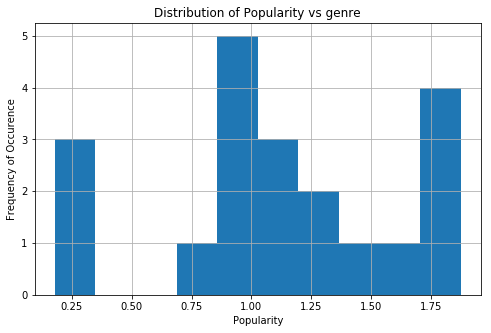

In [75]:
# Distribution of Popularity vs genre
mean_genre_data["popularity"].hist(figsize=(8,5));
#set the title of figure
plt.title('Distribution of Popularity vs genre')
#set the xlabel and y label of the figure
plt.xlabel('Popularity')
plt.ylabel('Frequency of Occurence')

look like the popularity score for movie genres is approximately between 0.9 and 1.25

In [76]:
#sorting the highest popularity by genre
mean_genre_data.sort_values('popularity', ascending=False).popularity


genre
Science Fiction    1.873294
Adventure          1.867693
Fantasy            1.754315
Animation          1.710622
Action             1.567116
Family             1.459043
Thriller           1.258950
War                1.246129
Mystery            1.142613
Western            1.134246
Crime              1.123961
Comedy             1.012321
Drama              1.001411
History            0.970674
Romance            0.954889
Music              0.899005
Horror             0.854005
Documentary        0.294458
TV Movie           0.273628
Foreign            0.179608
Name: popularity, dtype: float64

from the statistics >Science Fiction has the most popularity (with=1.873294) and Foreign has the lower popularity with(0.179608)

Text(0,0.5,'popularity')

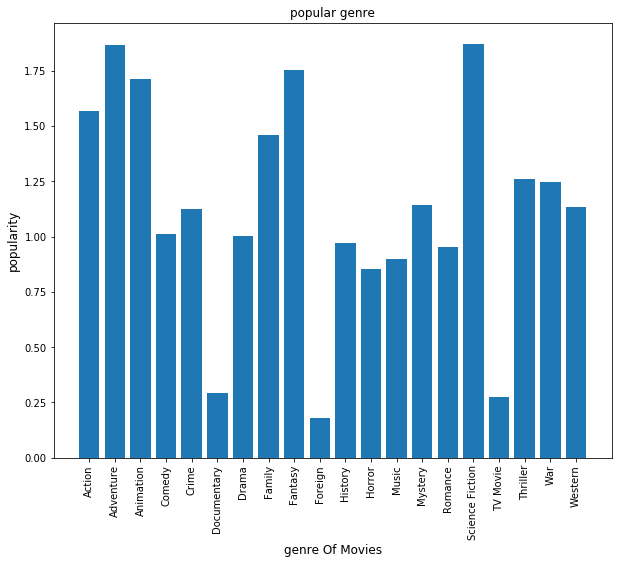

In [77]:
# visualize the relations between the genres and popularity

x=all_mean["genre"]
y=all_mean["popularity"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.title("popular genre",fontsize=12)
plt.xlabel('genre Of Movies',fontsize=12)
plt.ylabel("popularity",fontsize= 12)


as we see at the bars it confirm with statistics which **the Science Fiction genre** has the most popularity (with=1.873294)
and **the Foreign genre** has the little  popularity (with 0.179608)

# Question 2 :which genre has the The Highest budget?

Text(0,0.5,'budget')

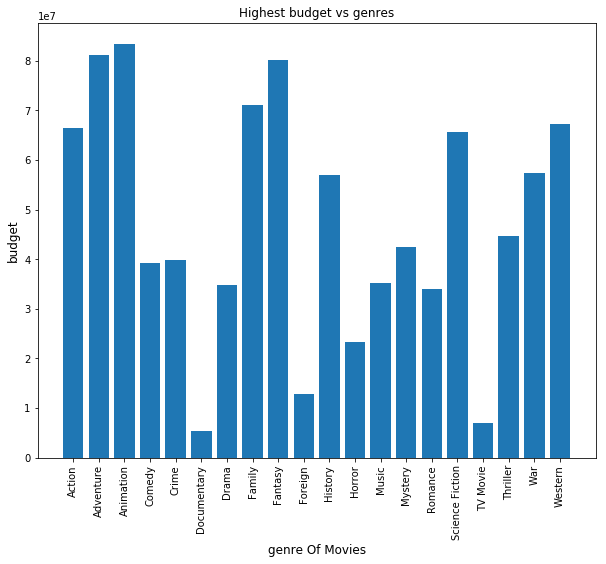

In [78]:
# visualize the relations between the genres and budget
x=all_mean["genre"]
y=all_mean["budget_adj"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
#setup the title of the figure
plt.title("Highest budget vs genres",fontsize=12)
#setup the xlabel and ylabel of the figure
plt.xlabel('genre Of Movies',fontsize=12)
plt.ylabel("budget",fontsize= 12)

obviously with bars that **Animation genre** has the highest budget and the **Documentary genre** is the lowest budget we can confirm that with numbers at next cell

In [79]:
#sorting the highest budget by genre

mean_genre_data.sort_values('budget_adj', ascending=False).budget_adj


genre
Animation          8.347215e+07
Adventure          8.125573e+07
Fantasy            8.023752e+07
Family             7.110099e+07
Western            6.719107e+07
Action             6.644262e+07
Science Fiction    6.561722e+07
War                5.727295e+07
History            5.687985e+07
Thriller           4.460177e+07
Mystery            4.236264e+07
Crime              3.991007e+07
Comedy             3.917646e+07
Music              3.519802e+07
Drama              3.471246e+07
Romance            3.390431e+07
Horror             2.324071e+07
Foreign            1.289824e+07
TV Movie           6.951084e+06
Documentary        5.379702e+06
Name: budget_adj, dtype: float64

look like **Animation genre** has the Highest budget (with=8.347215e+07)
and **Documentary genre** has the lower budget (with=5.379702e+06) and that confirm with what we saw at the bars Visualizations 

# Question 3:which genre has the The Highest revenue ?

Text(0,0.5,'revenue')

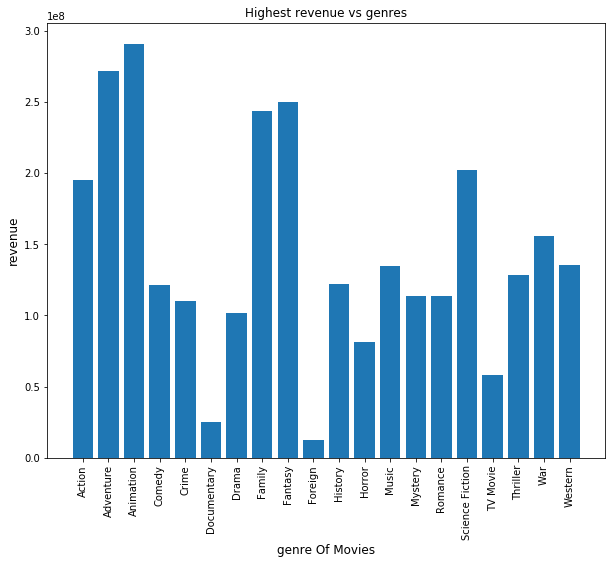

In [80]:
#plot the relations between the genres and budget
x=all_mean["genre"]
y=all_mean["revenue_adj"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
#setup the title of the figure
plt.title("Highest revenue vs genres",fontsize=12)
#setup the xlabel and ylabel of the figure
plt.xlabel('genre Of Movies',fontsize=12)
plt.ylabel("revenue",fontsize= 12)

from the bars Visualizations we can see that the **Animation genre** has highest revenue and the **foreign genre** has the lowest revenue 
we can confirm that with numbers at the next cell 

In [81]:
#sorting the highest revenue by genre
mean_genre_data.sort_values('revenue_adj', ascending=False).revenue_adj


genre
Animation          2.909574e+08
Adventure          2.714075e+08
Fantasy            2.499928e+08
Family             2.437910e+08
Science Fiction    2.021531e+08
Action             1.953879e+08
War                1.558981e+08
Western            1.356748e+08
Music              1.345660e+08
Thriller           1.281709e+08
History            1.216617e+08
Comedy             1.213085e+08
Mystery            1.136210e+08
Romance            1.135198e+08
Crime              1.103951e+08
Drama              1.013785e+08
Horror             8.140656e+07
TV Movie           5.838910e+07
Documentary        2.480617e+07
Foreign            1.273378e+07
Name: revenue_adj, dtype: float64

look like **Animation genre** has the Highest revenue (with=2.909574e+08)
and **Documentary** has the lower revenue (with=1.273378e+07) and that confirm with what we saw at the bars Visualizations

# Question 4 :  the run time of the movies  increases or decreases from year to year ?

In [82]:
#avarge run time 
data["runtime"].mean()

109.56857226050664

as we see the avg run time of movies is approx 110 min

In [83]:
#make a Group of mean runtime by release_year
#i used here the clean datafram 'data' to make the group
mean_rel_run= data.groupby('release_year').runtime.mean()
mean_rel_run

release_year
1960    132.785714
1961    130.750000
1962    154.500000
1963    156.947368
1964    127.136364
1965    165.933333
1966    144.750000
1967    119.820513
1968    132.740741
1969    126.900000
1970    123.081081
1971    111.487179
1972    115.888889
1973    112.322581
1974    119.527778
1975    120.619048
1976    120.513514
1977    108.684211
1978    122.500000
1979    116.375000
1980    117.206897
1981    105.567164
1982    111.662338
1983    108.827957
1984    108.871795
1985    104.292035
1986    106.196850
1987    103.312977
1988    104.025806
1989    106.697842
1990    108.605096
1991    109.173333
1992    111.653333
1993    111.422111
1994    108.449438
1995    111.444934
1996    109.787500
1997    115.157480
1998    112.185328
1999    107.590323
2000    108.945455
2001    109.513433
2002    106.961326
2003    109.748387
2004    106.789744
2005    110.202733
2006    108.887417
2007    107.051570
2008    109.051282
2009    106.744770
2010    107.586864
2011    106.061630

Text(0,0.5,'Runtime')

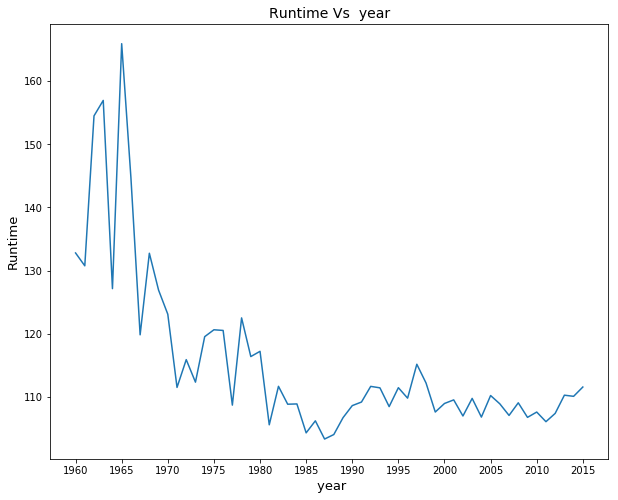

In [84]:
#plot the relations between runtime and release year between years (1960 and 2015)
mean_rel_run.plot(xticks = np.arange(1960,2016,5),figsize=(10,8));
#setup the title of the figure
plt.title("Runtime Vs  year",fontsize = 14)
#setup the x-label and y-label of the plot.
plt.xlabel(' year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)

as we see at the plot the run time decreasing year to year and that make sence because most of movies are short nowdayes and the avarge **runtime is 110 min**

# Question 5 : what is the genre with Highest vote ?

Text(0,0.5,'vote_average')

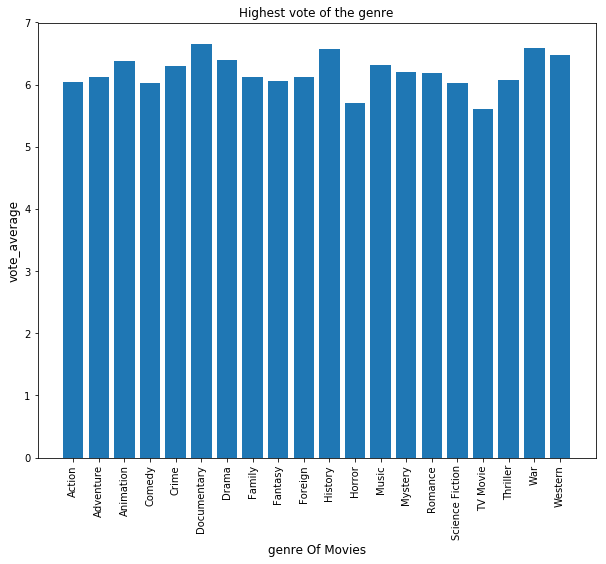

In [85]:
# the relations between the genres and popularity
x=all_mean["genre"]
y=all_mean["vote_average"]
fig,ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)
plt.xticks(rotation=90)
plt.title("Highest vote of the genre",fontsize=12)
plt.xlabel('genre Of Movies',fontsize=12)
plt.ylabel("vote_average",fontsize= 12)

as we see  most the bars has a high vote and most of them  are Convergent but as we can see there are approx 4 numbers are so close 
**Documentary**,**War**,**History** and **Western** genre we will know and decide  which of them have the high vote at next cell 

In [86]:
#sorting the highest vote average by genre

mean_genre_data.sort_values('vote_average', ascending=False).vote_average


genre
Documentary        6.660000
War                6.586555
History            6.578295
Western            6.467308
Drama              6.396754
Animation          6.380597
Music              6.315441
Crime              6.300614
Mystery            6.194767
Romance            6.189955
Family             6.127059
Adventure          6.124433
Foreign            6.123077
Thriller           6.066777
Fantasy            6.062879
Action             6.036959
Science Fiction    6.029287
Comedy             6.026436
Horror             5.710799
TV Movie           5.600000
Name: vote_average, dtype: float64

as we see  the four genres that we mentioned are sorted and the most avg voting genre is **Documentary genre** with = 6.66 and the lowest vote genre is **TV Movie genre** with =5.6

<a id='conclusions'></a>
## Conclusions

.**the Science Fiction genre** has the most popularity>
.**the Foreign genre** has the lowest popularity >
.**the Animation genre** has the Highest budget >
.**the Documentary genre** has the lower budget >
.**the Animation genre** has the Highest revenue>
.**the Documentary genre** has the lower revenue>
.**the run time decreasing year to year and avarge run time is 110 min**>
.the most avg voting genre is **Documentary** >
.the lowest vote genre is **TV Movie**
 ## Limitations
 .**Genre of movies may not be accurate**>>

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0